In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp

# To build a pipeline
from sklearn.pipeline import Pipeline

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV

In [155]:
def sel_col_model(df,reg_exp):
    '''
    This function return a filtered dataframe that contains given (reg_exp) in the column name
    Census_Tract and Year are set as index (if present)
    '''
    temp_df=df.copy()
    #df['Census_Tract']=df['Census_Tract'].astype('int32')        
    #temp_df=df.set_index(['Census_Tract','YEAR'],drop=True)
    new_df=temp_df.loc[:,[bool(re.search(reg_exp,col)) for col in temp_df]]
    if 'Census_Tract' in temp_df.columns:
        new_df=pd.concat([temp_df['Census_Tract'],new_df],axis=1)
    if 'YEAR' in temp_df.columns:
        new_df=pd.concat([temp_df['YEAR'],new_df],axis=1)
    
    return new_df

***

In [15]:
df=pd.read_csv('../data/interim/model.csv',index_col=0)

In [16]:
df

,Census_Tract,YEAR,PROCESSING_TIME,BUILDING_FEE_PAID,ZONING_FEE_PAID,OTHER_FEE_PAID,SUBTOTAL_PAID,TOTAL_FEE,REPORTED_COST,CENSUS_TRACT,...,CONTACT_1_TYPE_OWNER AS ARCHITECT & CONTRACTR,CONTACT_1_TYPE_OWNER AS GENERAL CONTRACTOR,CONTACT_1_TYPE_OWNER OCCUPIED,CONTACT_1_TYPE_PLUMBING CONTRACTOR,CONTACT_1_TYPE_RESIDENTAL REAL ESTATE DEV,CONTACT_1_TYPE_SELF CERT ARCHITECT,CONTACT_1_TYPE_SIGN CONTRACTOR,CONTACT_1_TYPE_STRUCTURAL ENGINEER,CONTACT_1_TYPE_TENT CONTRACTOR,CONTACT_1_TYPE_UNKNOWN
0,10100,2006,17.348382,413.985556,37.777778,10.555556,493.299778,599.616667,48492.866667,10100.0,...,0.0,0.177778,0.000000,0.0,0.0,0.022222,0.022222,0.022222,0.0,0.000000
1,10100,2007,22.516667,677.990417,46.041667,6.666667,775.550833,817.962500,54027.933333,10100.0,...,0.0,0.133333,0.000000,0.0,0.0,0.000000,0.000000,0.016667,0.0,0.066667
2,10100,2008,19.258065,546.300000,54.838710,4.838710,684.110968,733.522581,40469.000000,10100.0,...,0.0,0.129032,0.064516,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,10100,2009,41.891304,258.618261,45.108696,1.086957,304.813913,318.517609,7879.021739,10100.0,...,0.0,0.152174,0.021739,0.0,0.0,0.000000,0.021739,0.239130,0.0,0.000000
4,10100,2010,9.812500,377.141094,44.531250,7.031250,459.476562,474.984062,18547.517812,10100.0,...,0.0,0.062500,0.031250,0.0,0.0,0.031250,0.031250,0.031250,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12421,844700,2019,21.800000,437.116667,54.166667,5.000000,542.450000,550.783333,30958.900000,844700.0,...,0.0,0.033333,0.100000,0.0,0.0,0.033333,0.000000,0.000000,0.0,0.000000
12422,844700,2020,28.125000,355.068333,43.229167,0.000000,406.110000,406.110000,30187.375000,844700.0,...,0.0,0.041667,0.208333,0.0,0.0,0.000000,0.041667,0.000000,0.0,0.000000
12423,844700,2021,13.555556,517.115556,33.333333,8.333333,635.617778,666.652593,36729.222222,844700.0,...,0.0,0.148148,0.037037,0.0,0.0,0.148148,0.000000,0.037037,0.0,0.037037
12424,844700,2022,7.684211,726.527895,28.289474,21.710526,877.035263,966.601579,78580.078947,844700.0,...,0.0,0.000000,0.078947,0.0,0.0,0.052632,0.000000,0.026316,0.0,0.000000


***
<center><h3>Target columns<center><h3>

In [156]:
def select_y(df):
    df_result=pd.concat([sel_col_model(df,'target'),sel_col_model(df,'change')],axis=1)
    return df_result

In [157]:
df_Y=select_y(df)
y_li=[y for y in list(df_Y.columns) if y not in ['YEAR','Census_Tract']]

In [152]:
df_Y

,YEAR,Census_Tract,2015_target_a,2021_target_a,2015_target_b,2021_target_b,2015_target_c,2021_target_c,2015_target_d,2021_target_d,YEAR,Census_Tract,5y_inc_change_2015,5y_inc_change_2021
0,2006,10100,0.0,1.0,0.0,1.0,0.0,3.0,-3.4737,4.7419,2006,10100,-3588.26,124255.31
1,2007,10100,0.0,1.0,0.0,1.0,0.0,3.0,-3.4737,4.7419,2007,10100,-3588.26,124255.31
2,2008,10100,0.0,1.0,0.0,1.0,0.0,3.0,-3.4737,4.7419,2008,10100,-3588.26,124255.31
3,2009,10100,0.0,1.0,0.0,1.0,0.0,3.0,-3.4737,4.7419,2009,10100,-3588.26,124255.31
4,2010,10100,0.0,1.0,0.0,1.0,0.0,3.0,-3.4737,4.7419,2010,10100,-3588.26,124255.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12421,2019,844700,0.0,0.0,0.0,0.0,0.0,1.0,-4.3446,0.5246,2019,844700,-4487.96,13747.56
12422,2020,844700,0.0,0.0,0.0,0.0,0.0,1.0,-4.3446,0.5246,2020,844700,-4487.96,13747.56
12423,2021,844700,0.0,0.0,0.0,0.0,0.0,1.0,-4.3446,0.5246,2021,844700,-4487.96,13747.56
12424,2022,844700,0.0,0.0,0.0,0.0,0.0,1.0,-4.3446,0.5246,2022,844700,-4487.96,13747.56


In [134]:
df_X=df.drop(columns=df_Y.columns).groupby(['Census_Tract','YEAR']).mean()

In [102]:
df_X

PROCESSING_TIME  BUILDING_FEE_PAID  ZONING_FEE_PAID  \
Census_Tract YEAR                                                        
10100        2006        17.348382         413.985556        37.777778   
             2007        22.516667         677.990417        46.041667   
             2008        19.258065         546.300000        54.838710   
             2009        41.891304         258.618261        45.108696   
             2010         9.812500         377.141094        44.531250   
...                            ...                ...              ...   
844700       2019        21.800000         437.116667        54.166667   
             2020        28.125000         355.068333        43.229167   
             2021        13.555556         517.115556        33.333333   
             2022         7.684211         726.527895        28.289474   
             2023        29.875000         232.625000        15.625000   

                   OTHER_FEE_PAID  SUBTOTAL_PAID   TOTAL_FEE  REPORTED_COST  \
Census_Tract YEAR                                                             
10100        2006       10.555556     493.299778  599.616667   48492.866667   
             2007        6.666667     775.550833  817.962500   54027.933333   
             2008        4.838710     684.110968  733.522581   40469.000000   
             2009        1.086957     304.813913  318.517609    7879.021739   
             2010        7.031250     459.476562  474.984062   18547.517812   
...                           ...            ...         ...            ...   
844700       2019        5.000000     542.450000  550.783333   30958.900000   
             2020        0.000000     406.110000  406.110000   30187.375000   
             2021        8.333333     635.617778  666.652593   36729.222222   
             2022       21.710526     877.035263  966.601579   78580.078947   
             2023        9.375000     326.500000  660.875000   24331.250000   

                   CENSUS_TRACT  Household_Count  \
Census_Tract YEAR                                  
10100        2006       10100.0           2224.5   
             2007       10100.0           2224.5   
             2008       10100.0           2224.5   
             2009       10100.0           2224.5   
             2010       10100.0           2224.5   
...                         ...              ...   
844700       2019      844700.0            650.5   
             2020      844700.0            650.5   
             2021      844700.0            650.5   
             2022      844700.0            650.5   
             2023      844700.0            650.5   

                   PERMIT_TYPE_EASY PERMIT PROCESS  ...  \
Census_Tract YEAR                                   ...   
10100        2006                         0.355556  ...   
             2007                         0.316667  ...   
             2008                         0.451613  ...   
             2009                         0.326087  ...   
             2010                         0.500000  ...   
...                                            ...  ...   
844700       2019                         0.233333  ...   
             2020                         0.291667  ...   
             2021                         0.370370  ...   
             2022                         0.578947  ...   
             2023                         0.500000  ...   

                   CONTACT_1_TYPE_OWNER AS ARCHITECT & CONTRACTR  \
Census_Tract YEAR                                                  
10100        2006                                            0.0   
             2007                                            0.0   
             2008                                            0.0   
             2009                                            0.0   
             2010                                            0.0   
...                                                          ...   
844700       2019                      

***
<center><h3>Baseline Models<center><h3>

In [230]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score


In [232]:
df_temp=df[df['YEAR']>2015]

df_temp=df_temp.groupby('Census_Tract').mean().drop(columns='YEAR')

df_X=df_temp.drop(columns=y_li)

df_Y=select_y(df_temp)

y=df_Y['5y_inc_change_2021']

X_train,X_test,y_train,y_test=train_test_split(df_X,y,test_size=0.3,random_state=5)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

my_linreg_d=LinearRegression()
my_linreg_d.fit(X_train_scaled,y_train)
print(f'Baseline train accuracy score {my_linreg_d.score(X_train_scaled,y_train)}')
print(f'Baseline test accuracy score {my_linreg_d.score(X_test_scaled,y_test)}')

y_pred = my_linreg_d.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
#print('MSE:', mse)


y_pred = my_linreg_d.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Baseline train accuracy score 0.19763010565172545
Baseline test accuracy score 0.0053803979892028675
R2 score: -30021343431.797157


c:\Users\44742\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#this is realy bad ;(

In [237]:
df_temp=df[(df['YEAR']>2015)&(df['YEAR']<2021)]

df_temp=df_temp.groupby('Census_Tract').mean().drop(columns='YEAR')

df_X=df_temp.drop(columns=y_li)

df_Y=select_y(df_temp)

y=df_Y['5y_inc_change_2021']

X_train,X_test,y_train,y_test=train_test_split(df_X,y,test_size=0.3,random_state=5)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

my_linreg_d=LinearRegression()
my_linreg_d.fit(X_train_scaled,y_train)
print(f'Baseline train accuracy score {my_linreg_d.score(X_train_scaled,y_train)}')
print(f'Baseline test accuracy score {my_linreg_d.score(X_test_scaled,y_test)}')

y_pred = my_linreg_d.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
#print('MSE:', mse)

y_pred = my_linreg_d.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Baseline train accuracy score 0.2165259008720819
Baseline test accuracy score 0.023426571223923442
R2 score: -1.5752032828836497e+27


c:\Users\44742\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#this is also bad

In [300]:
df_temp=df[(df['YEAR']>2006)&(df['YEAR']<2010)]

df_temp=df_temp.groupby('Census_Tract').mean().drop(columns='YEAR')

df_X=df_temp.drop(columns=y_li)

df_Y=select_y(df_temp)

y=df_Y['5y_inc_change_2015']

X_train,X_test,y_train,y_test=train_test_split(df_X,y,test_size=0.3,random_state=5)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

my_linreg_d=LinearRegression()
my_linreg_d.fit(X_train_scaled,y_train)
print(f'Baseline train accuracy score {my_linreg_d.score(X_train_scaled,y_train)}')
print(f'Baseline test accuracy score {my_linreg_d.score(X_test_scaled,y_test)}')

y_pred = my_linreg_d.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
#print('MSE:', mse)

y_pred = my_linreg_d.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Baseline train accuracy score 0.11514476904121063
Baseline test accuracy score -0.13555464633392855
R2 score: -2.779630183063939e+26


c:\Users\44742\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#this is beyond bad

In [274]:
df_X['CENSUS_TRACT']

0       10100.0
1       10201.0
2       10202.0
3       10300.0
4       10400.0
         ...   
702    843700.0
703    843800.0
704    843900.0
705    844600.0
706    844700.0
Name: CENSUS_TRACT, Length: 707, dtype: float64

In [330]:
df_temp=df[(df['YEAR']>2010)&(df['YEAR']<2016)]

df_temp=df_temp.groupby('Census_Tract').mean().drop(columns=['YEAR','CENSUS_TRACT'])

df_X=df_temp.drop(columns=y_li).reset_index(drop=True)

df_Y=select_y(df_temp)

y=df_Y['5y_inc_change_2021']

X_train,X_test,y_train,y_test=train_test_split(df_X,y,test_size=0.3,random_state=5)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

my_pca=PCA(n_components=2)
X_pca_train=my_pca.fit_transform(X_train_scaled)
X_pca_test=my_pca.transform(X_test_scaled)

my_linreg_d=LinearRegression()
my_linreg_d.fit(X_pca_train,y_train)
print(f'Baseline train accuracy score {my_linreg_d.score(X_pca_train,y_train)}')
print(f'Baseline test accuracy score {my_linreg_d.score(X_pca_test,y_test)}')

y_pred = my_linreg_d.predict(X_pca_test)
mse = mean_squared_error(y_test, y_pred)
#print('MSE:', mse)

y_pred = my_linreg_d.predict(X_pca_test)
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Baseline train accuracy score 0.07357199992593155
Baseline test accuracy score 0.11214361071401002
R2 score: 0.11214361071401002


* How are the areas are distributed

#this is great in comparison but still really bad

In [305]:
components=my_pca.components_

components=components.flatten()

pd.DataFrame({'Feature':X_train.columns,'pca_1':components}).sort_values('pca_1',ascending=False)

,Feature,pca_1
5,TOTAL_FEE,3.194104e-01
4,SUBTOTAL_PAID,3.095644e-01
1,BUILDING_FEE_PAID,3.027615e-01
12,PERMIT_TYPE_NEW CONSTRUCTION,2.675333e-01
28,REVIEW_TYPE_STANDARD PLAN REVIEW,2.325222e-01
3,OTHER_FEE_PAID,2.201549e-01
26,REVIEW_TYPE_SELF CERT,2.187045e-01
6,REPORTED_COST,2.110716e-01
45,CONTACT_1_TYPE_OWNER,2.107244e-01
0,PROCESSING_TIME,1.973410e-01


In [282]:
#first_model=pd.DataFrame({'feature':df_X.columns,'coefficient':my_linreg_d.coef_}).sort_values('coefficient',ascending=False)

<AxesSubplot:xlabel='coefficient', ylabel='feature'>

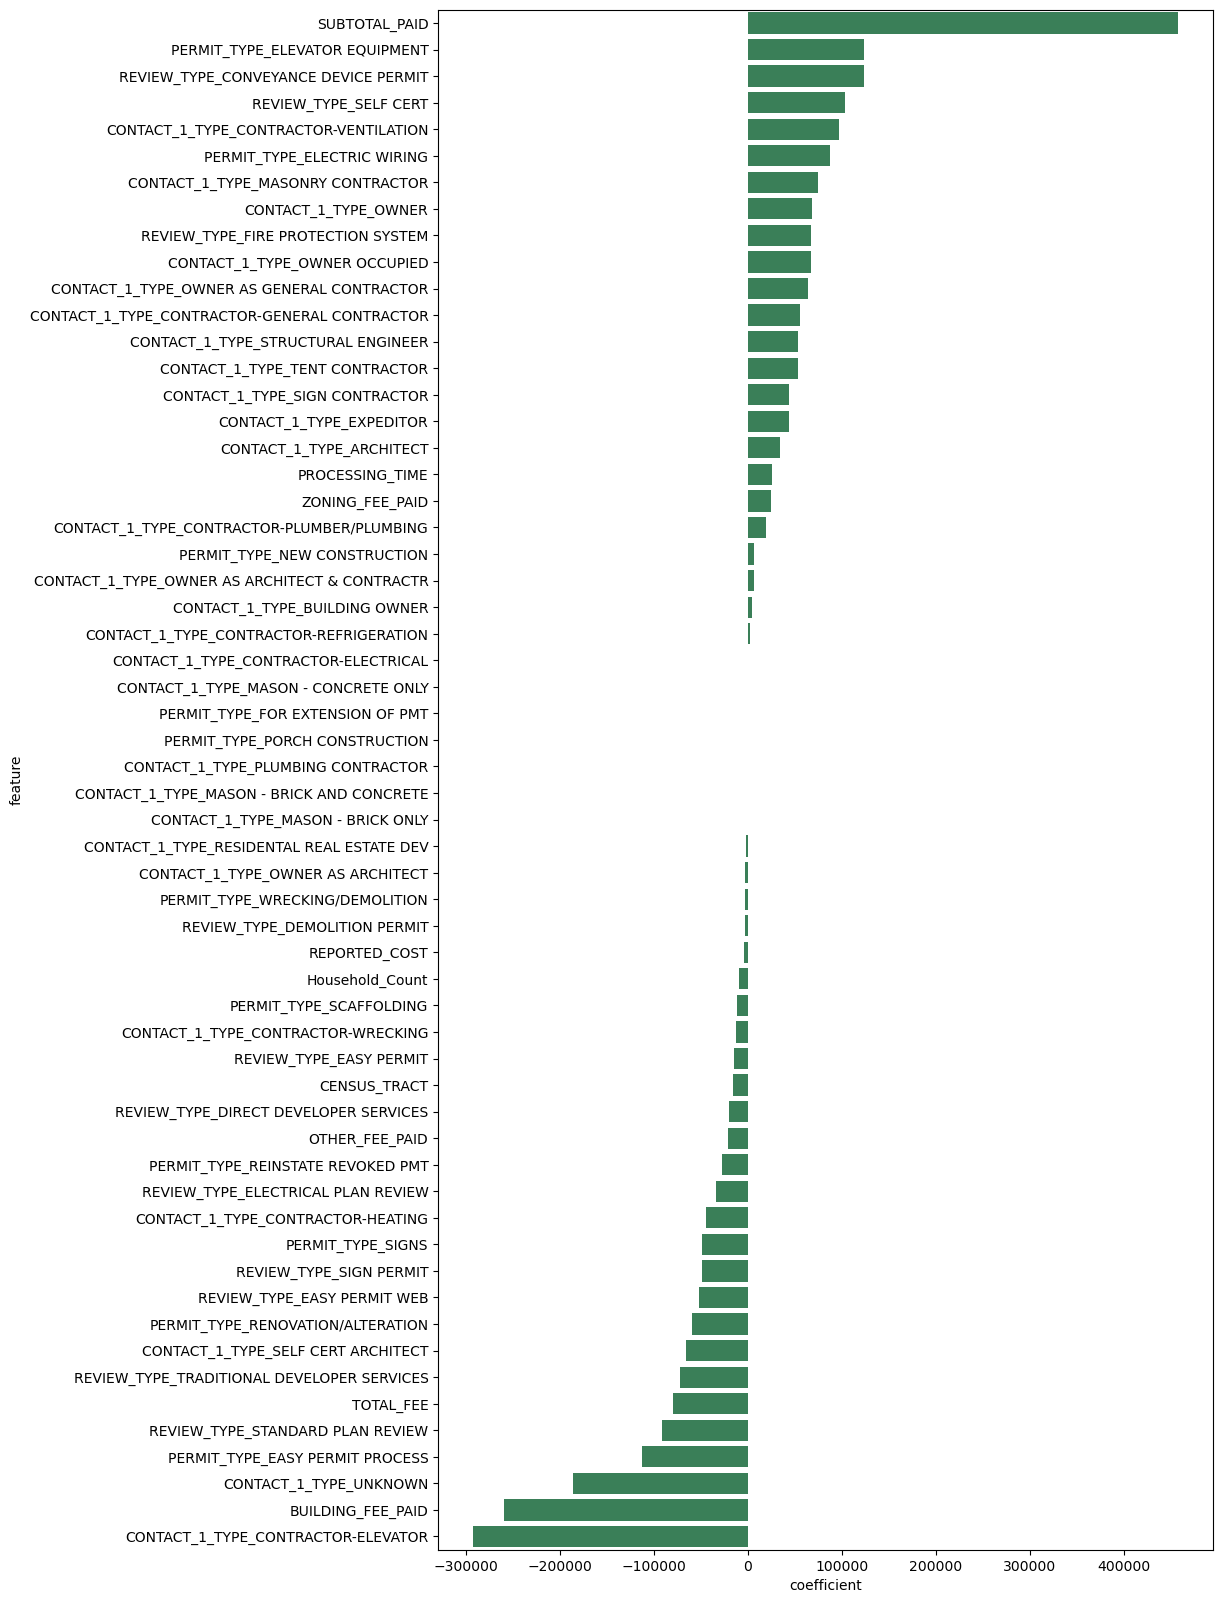

In [174]:
plt.figure(figsize=(10,20))
sns.barplot(data=first_model,y='feature',x='coefficient',color='seagreen')
#plt.xticks(rotation=45);

In [316]:
df_temp=df[(df['YEAR']>2009)&(df['YEAR']<2015)]

df_temp=df_temp.groupby('Census_Tract').mean().drop(columns=['YEAR','CENSUS_TRACT'])

df_X=df_temp.drop(columns=y_li).reset_index(drop=True)

df_Y=select_y(df_temp)

y=df_Y['2021_target_a']

X_train,X_test,y_train,y_test=train_test_split(df_X,y,test_size=0.3,random_state=5)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

my_pca=PCA(n_components=3)
X_pca_train=my_pca.fit_transform(X_train_scaled)
X_pca_test=my_pca.transform(X_test_scaled)

my_logreg1=LogisticRegression(C=5,max_iter=1000,random_state=5)
my_logreg1.fit(X_pca_train,y_train)
print(f'Baseline train accuracy score {my_logreg1.score(X_pca_train,y_train):.3f}%')
print(f'Baseline test accuracy score {my_logreg1.score(X_pca_test,y_test):.3f}%')

Baseline train accuracy score 0.603%
Baseline test accuracy score 0.643%


In [319]:
df_temp=df[(df['YEAR']>2005)&(df['YEAR']<2011)]

df_temp=df_temp.groupby('Census_Tract').mean().drop(columns=['YEAR','CENSUS_TRACT'])

df_X=df_temp.drop(columns=y_li).reset_index(drop=True)

df_Y=select_y(df_temp)

y=df_Y['2015_target_a']

X_train,X_test,y_train,y_test=train_test_split(df_X,y,test_size=0.3,random_state=5)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

my_pca=PCA(n_components=3)
X_pca_train=my_pca.fit_transform(X_train_scaled)
X_pca_test=my_pca.transform(X_test_scaled)

my_logreg1=LogisticRegression(C=5,max_iter=1000,random_state=5)
my_logreg1.fit(X_pca_train,y_train)
print(f'Baseline train accuracy score {my_logreg1.score(X_pca_train,y_train):.3f}%')
print(f'Baseline test accuracy score {my_logreg1.score(X_pca_test,y_test):.3f}%')

Baseline train accuracy score 0.567%
Baseline test accuracy score 0.558%


In [184]:
y=df_Y['2021_target_a']
X_train,X_test,y_train,y_test=train_test_split(df_X,y,test_size=0.3,random_state=5)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

my_logreg1=LogisticRegression(C=5,max_iter=1000,random_state=5)
my_logreg1.fit(X_train_scaled,y_train)
print(f'Baseline train accuracy score {my_logreg1.score(X_train_scaled,y_train):.3f}%')
print(f'Baseline test accuracy score {my_logreg1.score(X_test_scaled,y_test):.3f}%')

Baseline train accuracy score 0.668%
Baseline test accuracy score 0.570%


In [199]:
y=df_Y['2021_target_b']
X_train,X_test,y_train,y_test=train_test_split(df_X,y,test_size=0.3,random_state=5)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

my_logreg1=LogisticRegression(C=5,max_iter=1000,random_state=5)
my_logreg1.fit(X_train_scaled,y_train)
print(f'Baseline train accuracy score {my_logreg1.score(X_train_scaled,y_train):.3f}%')
print(f'Baseline test accuracy score {my_logreg1.score(X_test_scaled,y_test):.3f}%')

Baseline train accuracy score 0.761%
Baseline test accuracy score 0.771%


In [201]:
from sklearn.metrics import confusion_matrix

y_pred = my_logreg1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)

from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print('Recall score:', recall)

[[158  11]
 [ 42   3]]
Recall score: 0.06666666666666667


c:\Users\44742\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [191]:
y=df_Y['2021_target_c']
X_train,X_test,y_train,y_test=train_test_split(df_X,y,test_size=0.3,random_state=5)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

my_logreg1=LogisticRegression(C=1,max_iter=1000,random_state=5)
my_logreg1.fit(X_train_scaled,y_train)
print(f'Baseline train accuracy score {my_logreg1.score(X_train_scaled,y_train):.3f}%')
print(f'Baseline test accuracy score {my_logreg1.score(X_test_scaled,y_test):.3f}%')

Baseline train accuracy score 0.427%
Baseline test accuracy score 0.322%
